In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("First 5 samples:\n", X[:5])
print("First 5 labels:", y[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]


In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

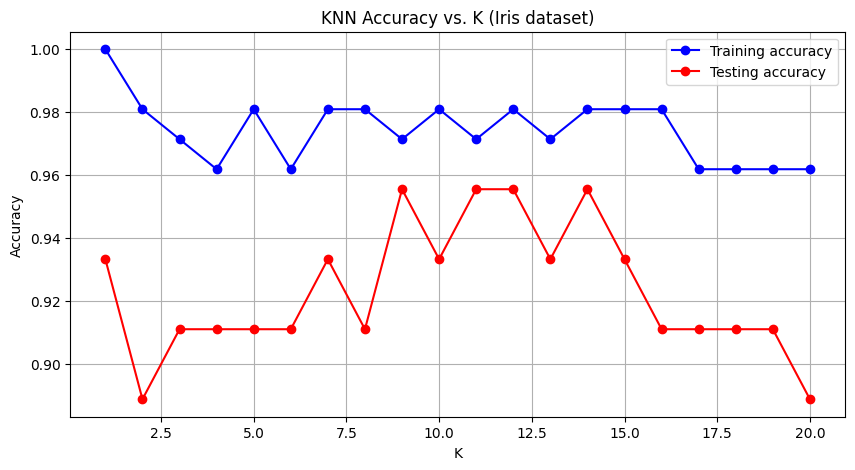

In [15]:
k_values = range(1, 21)
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Plot accuracy vs K
plt.figure(figsize=(10,5))
plt.plot(k_values, train_acc, 'b-o', label='Training accuracy')
plt.plot(k_values, test_acc, 'r-o', label='Testing accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K (Iris dataset)')
plt.legend()
plt.grid(True)
plt.show()